In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

# import warnings
# warnings.filterwarnings("error")

In [2]:
plt.style.use('../style/plots.mplstyle')
palette = ['#afc6e9ff', '#e9afafff']

In [3]:
pickle_sequential_2 = os.path.join('pickle', 'sequential_2.pickle')
pickle_sequential_5 = os.path.join('pickle', 'sequential_5.pickle')

pickle_parallel_2 = os.path.join('pickle', 'parallel_2.pickle')
pickle_parallel_5 = os.path.join('pickle', 'parallel_5.pickle')

pickle_task_switching_2 = os.path.join('pickle', 'task_switching_2.pickle')
pickle_task_switching_5 = os.path.join('pickle', 'task_switching_5.pickle')

In [4]:
with open(pickle_sequential_2, 'rb') as handle:
    results_sequential_2 = pickle.load(handle)

with open(pickle_sequential_5, 'rb') as handle:
    results_sequential_5 = pickle.load(handle)

with open(pickle_parallel_2, 'rb') as handle:
    results_parallel_2 = pickle.load(handle)

with open(pickle_parallel_5, 'rb') as handle:
    results_parallel_5 = pickle.load(handle)

with open(pickle_task_switching_2, 'rb') as handle:
    results_task_switching_2 = pickle.load(handle)

with open(pickle_task_switching_5, 'rb') as handle:
    results_task_switching_5 = pickle.load(handle)

In [5]:
num_runs = len(results_task_switching_2)
num_layers = len(results_task_switching_2[0]['parity'])

In [6]:
def calculate_participation_ratio(covariance):
    eigenvalues, _ = np.linalg.eig(covariance)
    return np.sum(eigenvalues) ** 2 / np.sum(eigenvalues ** 2) 

In [7]:
def calculate_dimensionality(activations_parallel):
    num_seeds = len(activations_parallel)
    names_tasks = list(activations_parallel[0].keys())
    num_layers = len(activations_parallel[0][names_tasks[0]])

    dimensionality_matrix = np.zeros((num_seeds, num_layers))
    for i_seed in range((num_seeds)):
        for i_layer in range(num_layers):
            activations_task = None
            for task in names_tasks:
                activity = activations_parallel[i_seed][task][f'layer{i_layer+1}']
                if activations_task is None:
                    activations_task = activity
                else:
                    activations_task = np.vstack((activations_task, activity))

            covariance = np.cov(activations_task)
            dimensionality = calculate_participation_ratio(covariance)

            assert np.imag(dimensionality) < 1e-10

            dimensionality_matrix[i_seed, i_layer] = np.real(dimensionality)

    return dimensionality_matrix
 

In [8]:
dimensionality_sequential_2 = calculate_dimensionality(results_sequential_2)
dimensionality_sequential_5 = calculate_dimensionality(results_sequential_5)

mean_dimensionality_sequential_2 = dimensionality_sequential_2.mean(axis=0)
mean_dimensionality_sequential_5 = dimensionality_sequential_5.mean(axis=0)

std_dimensionality_sequential_2 = dimensionality_sequential_2.std(axis=0)
std_dimensionality_sequential_5 = dimensionality_sequential_5.std(axis=0)

In [9]:
dimensionality_parallel_2 = calculate_dimensionality(results_parallel_2)
dimensionality_parallel_5 = calculate_dimensionality(results_parallel_5)

mean_dimensionality_parallel_2 = dimensionality_parallel_2.mean(axis=0)
mean_dimensionality_parallel_5 = dimensionality_parallel_5.mean(axis=0)

std_dimensionality_parallel_2 = dimensionality_parallel_2.std(axis=0)
std_dimensionality_parallel_5 = dimensionality_parallel_5.std(axis=0)

In [10]:
dimensionality_task_switching_2 = calculate_dimensionality(results_task_switching_2)
dimensionality_task_switching_5 = calculate_dimensionality(results_task_switching_5)

mean_dimensionality_task_switching_2 = dimensionality_task_switching_2.mean(axis=0)
mean_dimensionality_task_switching_5 = dimensionality_task_switching_5.mean(axis=0)

std_dimensionality_task_switching_2 = dimensionality_task_switching_2.std(axis=0)
std_dimensionality_task_switching_5 = dimensionality_task_switching_5.std(axis=0)

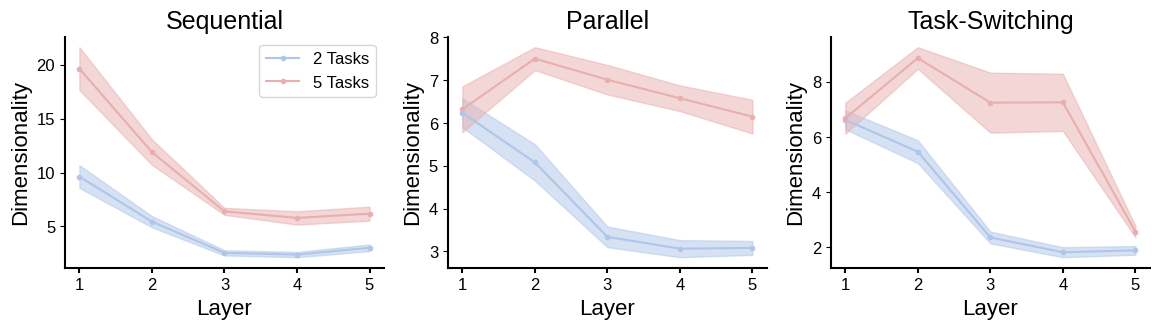

In [11]:
layers = list(range(1, num_layers+1))

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
ax[0].plot(layers, mean_dimensionality_sequential_2, '.-', color=palette[0])
ax[0].plot(layers, mean_dimensionality_sequential_5, '.-', color=palette[1])
ax[0].fill_between(layers,
                   mean_dimensionality_sequential_2-std_dimensionality_sequential_2,
                   mean_dimensionality_sequential_2+std_dimensionality_sequential_2,
                   color=palette[0],
                   alpha=.5)
ax[0].fill_between(layers,
                   mean_dimensionality_sequential_5-std_dimensionality_sequential_5,
                   mean_dimensionality_sequential_5+std_dimensionality_sequential_5,
                   color=palette[1],
                   alpha=.5)

ax[0].set_xticks(layers)
ax[0].set_xlabel('Layer')
ax[0].set_ylabel('Dimensionality')
ax[0].set_title('Sequential')
ax[0].legend(['2 Tasks', '5 Tasks'])

ax[1].plot(layers, mean_dimensionality_parallel_2, '.-', color=palette[0])
ax[1].plot(layers, mean_dimensionality_parallel_5, '.-', color=palette[1])
ax[1].fill_between(layers,
                   mean_dimensionality_parallel_2-std_dimensionality_parallel_2,
                   mean_dimensionality_parallel_2+std_dimensionality_parallel_2,
                   color=palette[0],
                   alpha=.5)
ax[1].fill_between(layers,
                   mean_dimensionality_parallel_5-std_dimensionality_parallel_5,
                   mean_dimensionality_parallel_5+std_dimensionality_parallel_5,
                   color=palette[1],
                   alpha=.5)

ax[1].set_xticks(layers)
ax[1].set_xlabel('Layer')
ax[1].set_ylabel('Dimensionality')
ax[1].set_title('Parallel')


ax[2].plot(layers, mean_dimensionality_task_switching_2, '.-', color=palette[0])
ax[2].plot(layers, mean_dimensionality_task_switching_5, '.-', color=palette[1])
ax[2].fill_between(layers,
                   mean_dimensionality_task_switching_2-std_dimensionality_task_switching_2,
                   mean_dimensionality_task_switching_2+std_dimensionality_task_switching_2,
                   color=palette[0],
                   alpha=.5)
ax[2].fill_between(layers,
                   mean_dimensionality_task_switching_5-std_dimensionality_task_switching_5,
                   mean_dimensionality_task_switching_5+std_dimensionality_task_switching_5,
                   color=palette[1],
                   alpha=.5)

ax[2].set_xticks(layers)
ax[2].set_xlabel('Layer')
ax[2].set_ylabel('Dimensionality')
ax[2].set_title('Task-Switching')

plt.show()